In [ ]:
print("Hello, AI studio! :D")

Hello, AI studio! :D


## Milestone 2:

**Goals**: EDA on pre-experiment data & present EDA findings and data preprocessing.


### Task 2

Load the pre-experiment dataset and perform initial exploration to understand its structure and features.

In [3]:
# Step 1: Uploading the parquet file.

from google.colab import files

uploaded = files.upload()

Saving pre_experiment_data.parquet to pre_experiment_data.parquet


In [4]:
# Step 2: Performing initial exploration to understand its attributes.

import pandas as pd

df = pd.read_parquet("pre_experiment_data.parquet")

revenue_per_customer = df.groupby('customer_id')['revenue (t)'].sum()
top_customers_ids = revenue_per_customer.sort_values(ascending=False).head(10).index
top_customers_df = df[df['customer_id'].isin(top_customers_ids)]
top_customers_df = top_customers_df.sort_values(by='revenue (t)', ascending=False)

print("Top 10 Customers: \n")
print(top_customers_df)

print("Info: \n")
print(df.info())
print("\n")

print("Columns: \n")
print(df.columns)
print("\n")

print("Shape: \n")
print(df.shape)
print("\n")

print("Attributes: \n")
print(df.describe())
print("\n")

print("Loyalty Member Counts:\n")
print(df['loyalty_membership'].value_counts())
print("\n")

Top 10 Customers: 

                                customer_id            name  aov (t-1)  \
6888   1fa417f2-273d-4219-96d0-463119d92904   Vincent Clark     292.11   
9      73e5c5bb-2ed5-4a8a-ab5e-1c85e712da66  Tasha Johnston     233.33   
11528  66084e44-c5c1-4055-af83-29f42e5939a2   Brenda Wright     202.80   
889    22606e37-e28f-4f31-98ef-4f2c8ea3cfa1    Nicole Lucas     226.40   
4765   03b08fb5-6b8d-4edf-9cfd-830d70eeeac7  Kathy Bradford     293.63   
9436   a117f3a3-e881-403e-814f-2934d5fbba69   Michael Mason     157.94   
4948   89a518f1-3218-48ba-8ff7-a29fbc22154c   Cassidy Yoder     215.88   
9663   e6e40c79-84fb-4ed3-928c-228cbf61fc0d   Derrick Wyatt     191.59   
18509  46895c02-4c36-4e2d-ae17-07ac24d3bd65      Leah White     138.98   
11389  e932b10e-16d5-4f77-b7ff-18996bdec9c9    Teresa Zhang     124.87   

       days_since_last_purchase (t-1)  tenure_in_days(t-1)  \
6888                               19                   64   
9                                  24    

### Task 3

Conduct data cleaning and preprocessing, including handling missing values, addressing outliers, encoding categorical variables, and normalizing numerical features

In [5]:
# Step 1: Checking for missing values.
df.isnull().sum()

,0
customer_id,0
name,0
aov (t-1),0
days_since_last_purchase (t-1),0
tenure_in_days(t-1),0
loyalty_membership,0
revenue (t),0


df.isnull() checks for missing values as true or false, and .sum() counts the number of missing values in each column. There are no missing values for the columns.

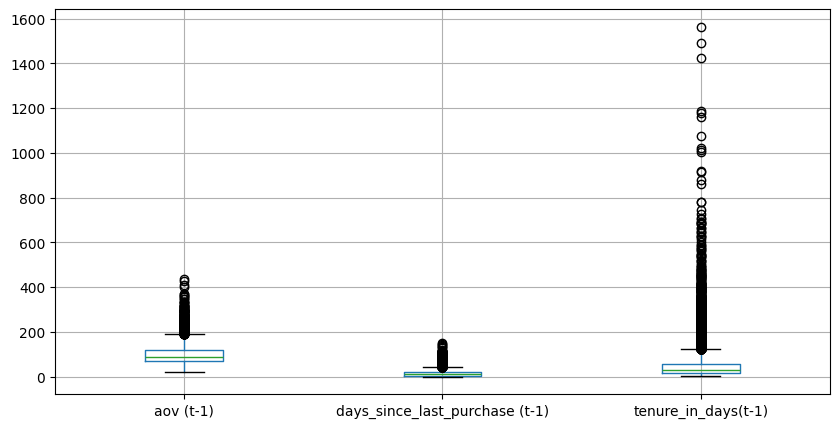

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2 Checking for ourliers through boxplot visualization.
number_columns = ['aov (t-1)', 'days_since_last_purchase (t-1)', 'tenure_in_days(t-1)']
df[number_columns].boxplot(figsize=(10, 5))
plt.show()

The boxplot above shows slight ourliers in the numeric columns, for aove (t-1) above 200 mark. There are longer gaps in days for the days_since_last_purchase (t-1) feature of around 30-40 days. There are beyond 1000 days for the tenure_in_days(t-1). This represents actual customer behavior and there could gaps between purchase, longer periods of tenure, and higher amounts of spending. These points will be kept since they represent potential customer behavior. They should be monitored during modelling to make sure they don't overly influence results.

In [7]:
'''
from sklearn.preprocessing import StandardScaler

# Step 1: Normalizing numerical features.
scaler = StandardScaler()
columns_to_scale = ['aov (t-1)', 'days_since_last_purchase (t-1)', 'tenure_in_days(t-1)']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

commented out to remove scalization'''

"\nfrom sklearn.preprocessing import StandardScaler\n\n# Step 1: Normalizing numerical features.\nscaler = StandardScaler()\ncolumns_to_scale = ['aov (t-1)', 'days_since_last_purchase (t-1)', 'tenure_in_days(t-1)']\ndf[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])\n\ncommented out to remove scalization"

The numerical features are scaled using StandardScaler, scaler adjusts each numerical column so that all the feaures can vary on the same scale, when the standard deviation is set to 1. This is important because if one column has values on different scales/larger numbers that it overtake the learning process and can one feature look like it's more important than the other. Normalizing these features helps scale them to have the same mean and standar deviation which can reduce training time and increase accuracy.

### Task 4

Task 4: Perform Exploratory Data Analysis (EDA) using summary statistics and visualizations to identify key patterns and relationships in the pre-experiment data.

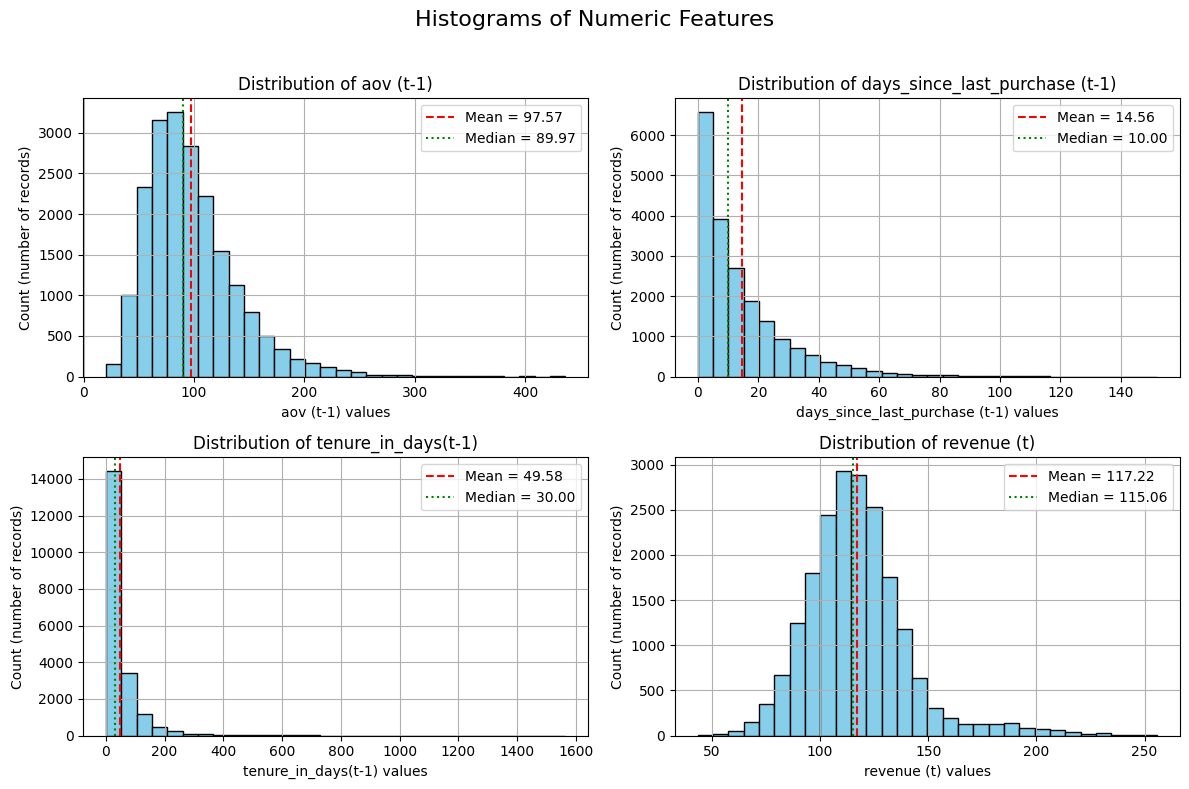

In [8]:
# Step 1: Distribution of Numeric Features
# This helps us understand the spread, skewness, and general shape of the data

# features we want to explore
features = ['aov (t-1)',
            'days_since_last_purchase (t-1)',
            'tenure_in_days(t-1)',
            'revenue (t)']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2x2 grid of histograms
axes = axes.flatten()  # flatten to make indexing easier

for i, col in enumerate(features):
    ax = axes[i]

    # plot histogram
    df[col].hist(ax=ax, bins=30, color="skyblue", edgecolor="black")

    # add labels
    ax.set_title(f"Distribution of {col}", fontsize=12)
    ax.set_xlabel(f"{col} values")   # x-axis → values of the feature
    ax.set_ylabel("Count (number of records)")  # y-axis → frequency

    # add mean and median lines
    mean_val = df[col].mean()
    median_val = df[col].median()
    ax.axvline(mean_val, color="red", linestyle="dashed", linewidth=1.5, label=f"Mean = {mean_val:.2f}")
    ax.axvline(median_val, color="green", linestyle="dotted", linewidth=1.5, label=f"Median = {median_val:.2f}")
    ax.legend()

plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


- **Step 1: Distribution of Numeric Features**: I explored four numeric features: Average Order Value (AOV), Days Since Last Purchase, Customer Tenure, and Revenue. I created a 2x2 grid of histograms so all features can be viewed side by side. Each histogram shows the feature values on the x-axis and the number of customers on the y-axis. Vertical lines indicate the mean (red, dashed) and median (green, dotted) to help understand skewness.

- **Average Order Value (AOV)**: Most customers are clustered on the left with low or even negative AOVs, possibly due to returns or discounts. The median is slightly negative, while a few high-spending customers pull the mean up to zero. **Takeaway**: The majority of customers spend little, but a small elite group contributes disproportionately. Strategies should differ for these groups.

- **Days Since Last Purchase**: Values below zero mean more recent than average, positive values mean longer than average. Distribution is right-skewed: most customers purchased recently (active), but there’s a long tail of inactive customers. **Takeaway**: Nurture the active base and target the inactive group with re-engagement campaigns.

- **Customer Tenure**: X-axis shows standardized tenure; negative = newer than average, positive = longer than average. Most customers are new (median below zero), with a small long-tail of loyal, long-term customers. Takeaway: Focus on helping new customers stay and convert into loyal customers while continuing to reward long-term customers.

- **Revenue (Current Period)**: Revenue ranges from \$0 to ~\$250. Most customers are around the median of \$115; the mean is slightly higher at \$117 due to a few high spenders. Three groups:  
  * Core: \$50–\$150, stable majority  
  * High-value tail: \$150–\$250, few customers but boost overall revenue  
  * Low-value: <\$50, new or inactive customers  
  
- **Takeaway**: Protect the core, cultivate high-value customers, and help low-revenue customers move toward the core.

/tmp/ipython-input-657508800.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loyalty_membership', data=df, palette="Set2")


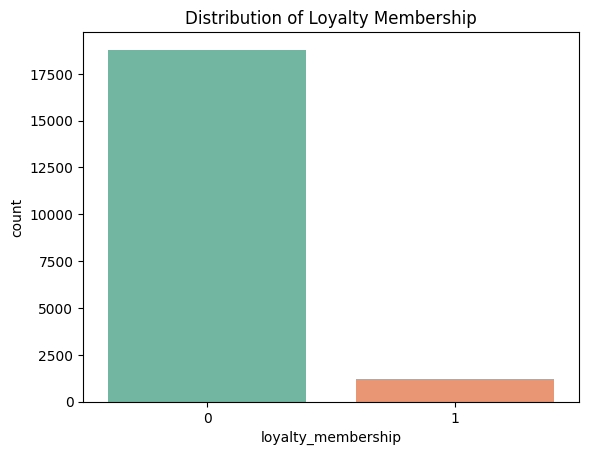

In [9]:
# Step 2: Distribution of Loyalty Membership
# Shows how many customers are in the loyalty program (0 = non-member, 1 = member)

sns.countplot(x='loyalty_membership', data=df, palette="Set2")
plt.title("Distribution of Loyalty Membership")
plt.show()

The distribution shows that the majority of customers are not in the loyalty program, with around 17,500 non-members compared to fewer than 2,500 members. This highlights a strong imbalance between the two groups. It suggests that loyalty membership adoption is relatively low and may play a distinct role in customer behavior analysis.

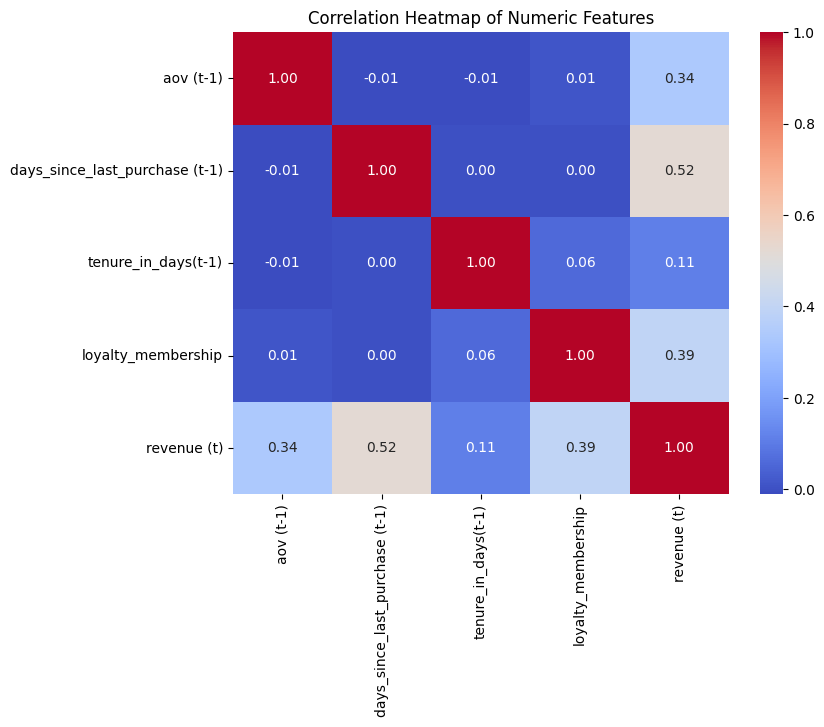

In [10]:
# Step 3: Relationships Between Numeric Features
# This helps identify which variables are strongly related to each other
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(method='spearman', numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

The correlation heatmap shows that each variable is perfectly correlated with itself (diagonal red), as expected. There is a mild positive correlation between past average order value (aov (t-1)) and current revenue (revenue (t)), suggesting higher past spending is associated with higher current revenue. The moderate positive correlation between days_since_last_purchase and the revenue suggests that customers who had longer gaps since their last purchase in the previous period tend to have higher revenue in the current period. In addition, loyalty membership seems to contribute to higher revenue. On the other hand, the number of days a customer has been transacting business with the company (tenure_in_days(t-1)) has an almost neglibile effect on the revenue.

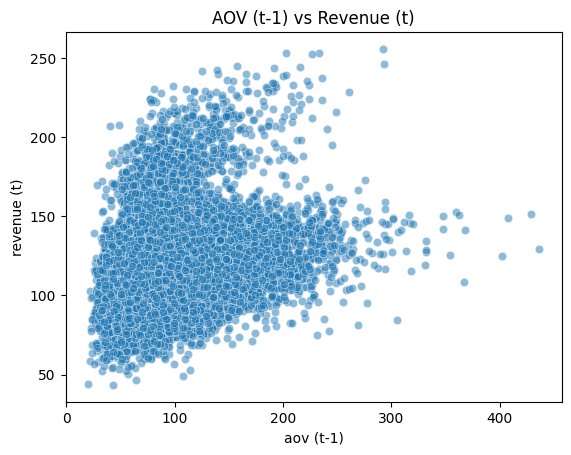

In [11]:
# Step 4: AOV vs Revenue
# Scatterplot to see if customers with higher past average order value (aov) also have higher revenue in the current period
sns.scatterplot(x='aov (t-1)', y='revenue (t)', data=df, alpha=0.5)
plt.title("AOV (t-1) vs Revenue (t)")
plt.show()

- **Step 4: AOV vs Revenue**  
  * Scatterplot to see if past spending predicts current revenue  
  * **X-axis:** Past Average Order Value (AOV), ~ -2 to 8  
  * **Y-axis:** Current revenue per customer, up to ~$250  
  * Each dot = one customer; slightly transparent to show overlaps  

- **Observations:**  
  * Clear upward trend: higher past AOV → higher current revenue  
  * Points cluster tightly, showing AOV is a strong predictor  

- **Takeaway:**  
  * Customers who spent more per order in the past are likely high-value now  
  * Focus on retaining these high-AOV customers and prioritize marketing/loyalty efforts toward them

/tmp/ipython-input-3230388636.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loyalty_membership', y='revenue (t)', data=df, palette="Set3")


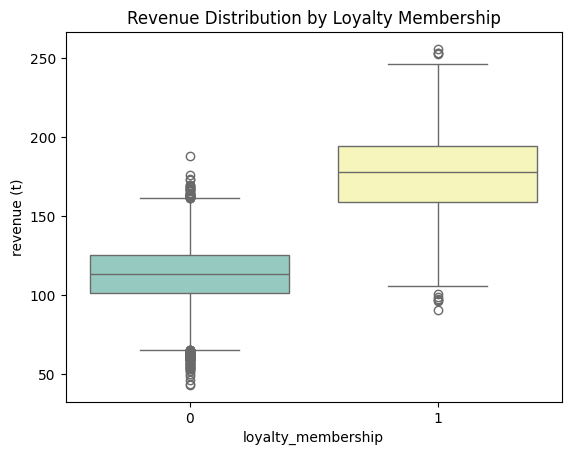

In [12]:
# Step 5: Revenue by Loyalty Membership
# Boxplot to compare revenue distribution between members and non-members
sns.boxplot(x='loyalty_membership', y='revenue (t)', data=df, palette="Set3")
plt.title("Revenue Distribution by Loyalty Membership")
plt.show()

The boxplot shows that loyalty members generate higher revenue than non-members, with a median around $175 compared to $110 for non-members. This indicates that membership is associated with increased spending. While there is some variation within each group, the key insight is that loyalty membership correlates with higher customer revenue.

In [13]:
# Step 6: Average Revenue and AOV by Loyalty Status
# Provides numerical evidence for differences between loyalty members and non-members
print("Average revenue by loyalty membership:\n", df.groupby('loyalty_membership')['revenue (t)'].mean(), "\n")
print("Average AOV (t-1) by loyalty membership:\n", df.groupby('loyalty_membership')['aov (t-1)'].mean(), "\n")

Average revenue by loyalty membership:
 loyalty_membership
0    113.354800
1    177.464888
Name: revenue (t), dtype: float64 

Average AOV (t-1) by loyalty membership:
 loyalty_membership
0    97.445541
1    99.461549
Name: aov (t-1), dtype: float64 



The numerical analysis confirms that loyalty members are higher-value customers. On average, members generate \$177 in revenue compared to \$113 for non-members, and they also had slightly higher past average order values. This reinforces the insight that loyalty membership is associated with increased spending and customer value.


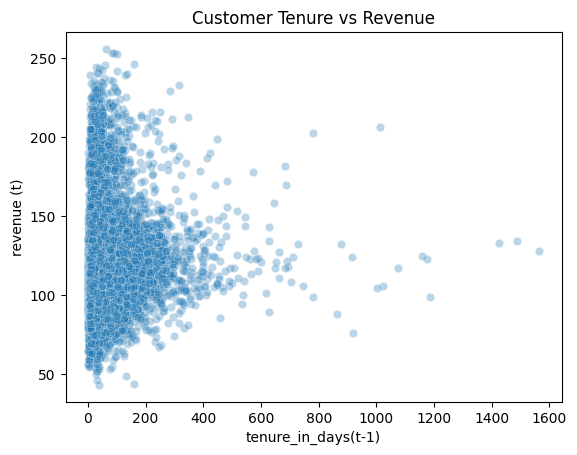

In [14]:
# Step 7: Tenure vs Revenue
# Helps see if long-term customers contribute more revenue
sns.scatterplot(x='tenure_in_days(t-1)', y='revenue (t)', data=df, alpha=0.3)
plt.title("Customer Tenure vs Revenue")
plt.show()

**Step 7: Customer Tenure vs Revenue**

- X-axis: Customer tenure from previous period  
- Y-axis: Revenue in the current period  
- Each dot = a customer (slightly transparent to show overlaps)  

**Key Insights:**  
- Tenure alone does **not** strongly predict revenue  
- Long-term customers can be inactive or low-value  
- Past spending (AOV) is a much better predictor of revenue  
- Re-engagement of inactive long-term customers is an opportunity  
- Onboarding new customers effectively can encourage high-value habits  

**Conclusion:**  
Customer value comes from active engagement and spending, not just how long they've been with us.

## Milestone 3:

**Goals**: Power analysis on the pre-experiment data using two methods -- Standard t-test and MLRATE

**Method 1**: Standard Power Analysis (t-test)

In [22]:
from statsmodels.stats.power import TTestIndPower

mde_percent = 0.01
mean_revenue = df['revenue (t)'].mean()
diff = mde_percent * mean_revenue

analysis = TTestIndPower()
effect_size = diff / df['revenue (t)'].std()
sample_size = analysis.solve_power(
    effect_size=effect_size,
    power=0.9,
    alpha=0.05,
    alternative="two-sided",
)
print("Required sample size per group (T-Test):", round(sample_size))

Required sample size per group (T-Test): 8801


The power analysis using the t-test method shows that detecting a minimum detectable effect (MDE) of just 1% of mean revenue with 90% power at a 5% significance level requires approximately 8,801 observations per group, or about 17,600 in total. This large sample size reflects the fact that very small effects are statistically harder to detect, since the difference between groups is small relative to the natural variation in revenue.

**Method 2**: MLRATE Power Analysis

In [23]:
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.power import TTestIndPower

# Step 0: Define outcome and features
# y is our target (revenue at time t) that we want to explain
y = df['revenue (t)'].values

# x are the predictors (features from time t-1 and loyalty status)
# these will help us explain some of the variance in revenue
X = df[['aov (t-1)',
        'days_since_last_purchase (t-1)',
        'tenure_in_days(t-1)',
        'loyalty_membership']].values


# Step 1: Cross-fitting predictions
# we split the data into 2 folds so we can predict on data the model hasn't seen
kf = KFold(n_splits=2, shuffle=True, random_state=42)

# create empty array to store predictions
G = np.zeros_like(y)

# train on one half, predict on the other half
for train_idx, test_idx in kf.split(X):
    model = RandomForestRegressor(random_state=42)
    model.fit(X[train_idx], y[train_idx])        # train model
    G[test_idx] = model.predict(X[test_idx])     # save predictions


# Step 2: Fit OLS with G
# add a constant (intercept) to predictions
G = sm.add_constant(G)

# regress actual revenue on predicted revenue
# residuals here = the part of revenue we still can't explain
ols_model = sm.OLS(y, G).fit(cov_type="HC0")


# Step 3: Extract residuals & std
# get the unexplained part of revenue (residuals)
residuals = ols_model.resid

# calculate the standard deviation of residuals
resid_std = residuals.std(ddof=1)


# Step 4: Compute new effect size (MLRATE)
# define minimum detectable effect (mde) as 1% of average revenue
mde_percent = 0.01
mean_revenue = df['revenue (t)'].mean()
diff = mde_percent * mean_revenue

# effect size = mde / std of residuals
effect_size_mlr = diff / resid_std


# Step 5: Power analysis with new effect size
# calculate required sample size per group (90% power, 5% alpha, two-sided test)
analysis = TTestIndPower()
sample_size_mlr = analysis.solve_power(
    effect_size=effect_size_mlr,
    power=0.9,
    alpha=0.05,
    alternative="two-sided",
)

print("Required sample size per group (MLRATE):", round(sample_size_mlr))


Required sample size per group (MLRATE): 2778


The power analysis using the MLRATE method shows that detecting a minimum detectable effect (MDE) of just 1% of mean revenue with 90% power at a 5% significance level requires approximately 2,778 observations per group, or about 5,556 in total. This reduced sample size reflects the fact that variance reduction through covariate adjustment makes it easier to detect small effects, since much of the natural variation in revenue is explained away by prior customer behavior.

**Comparison**: Method 1 requires the sample size per group of 8801 while Method 2 requires the sample size per group of 2778. 8801 > 2278. The MLRATE sample size is smaller.

**Recreation of the Residual Distribution Plot**

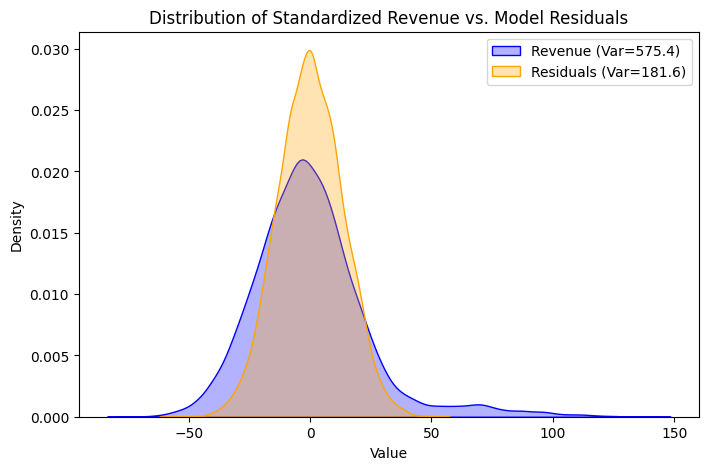

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure numeric arrays
y = np.asarray(y, dtype=float)
residuals = np.asarray(residuals, dtype=float)

# Standardize (center both at 0)
revenue_std = y - np.mean(y)
residuals_std = residuals - np.mean(residuals)

# Compute variances
var_revenue = np.var(revenue_std, ddof=1)
var_residuals = np.var(residuals_std, ddof=1)

# Plot KDE curves
plt.figure(figsize=(8,5))
sns.kdeplot(revenue_std, color="blue", fill=True, alpha=0.3, label=f"Revenue (Var={var_revenue:.1f})")
sns.kdeplot(residuals_std, color="orange", fill=True, alpha=0.3, label=f"Residuals (Var={var_residuals:.1f})")

plt.title("Distribution of Standardized Revenue vs. Model Residuals")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()


Method two uses the MLRATE technique which significantly reduces variances.
181.6 / 575.4 = 0.316 and 1 = 0.316 is 0.684. So MLRATE reduces variance by 68.4%. MLRATE only needs 31.6% of the sample size from the t-test/ MLRATE cuts the sample size by 68%.